In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置出版级绘图风格
plt.rcParams.update({
    # "font.family": "serif",          # 使用衬线字体 (类似 Times New Roman)
    # "font.serif": ["Times New Roman", "DejaVu Serif"],
    "font.size": 14,                 # 全局字号
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "xtick.direction": "in",         # 刻度朝内
    "ytick.direction": "in",
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "figure.figsize": (6, 5),        # 图片默认大小
    # "mathtext.fontset": "cm"         # 数学公式使用 Computer Modern 字体
})

Reading data from ../data/T_scan_L24_J0.8_W1.0_imp0.0_mu_-1.4/summary_all.csv...


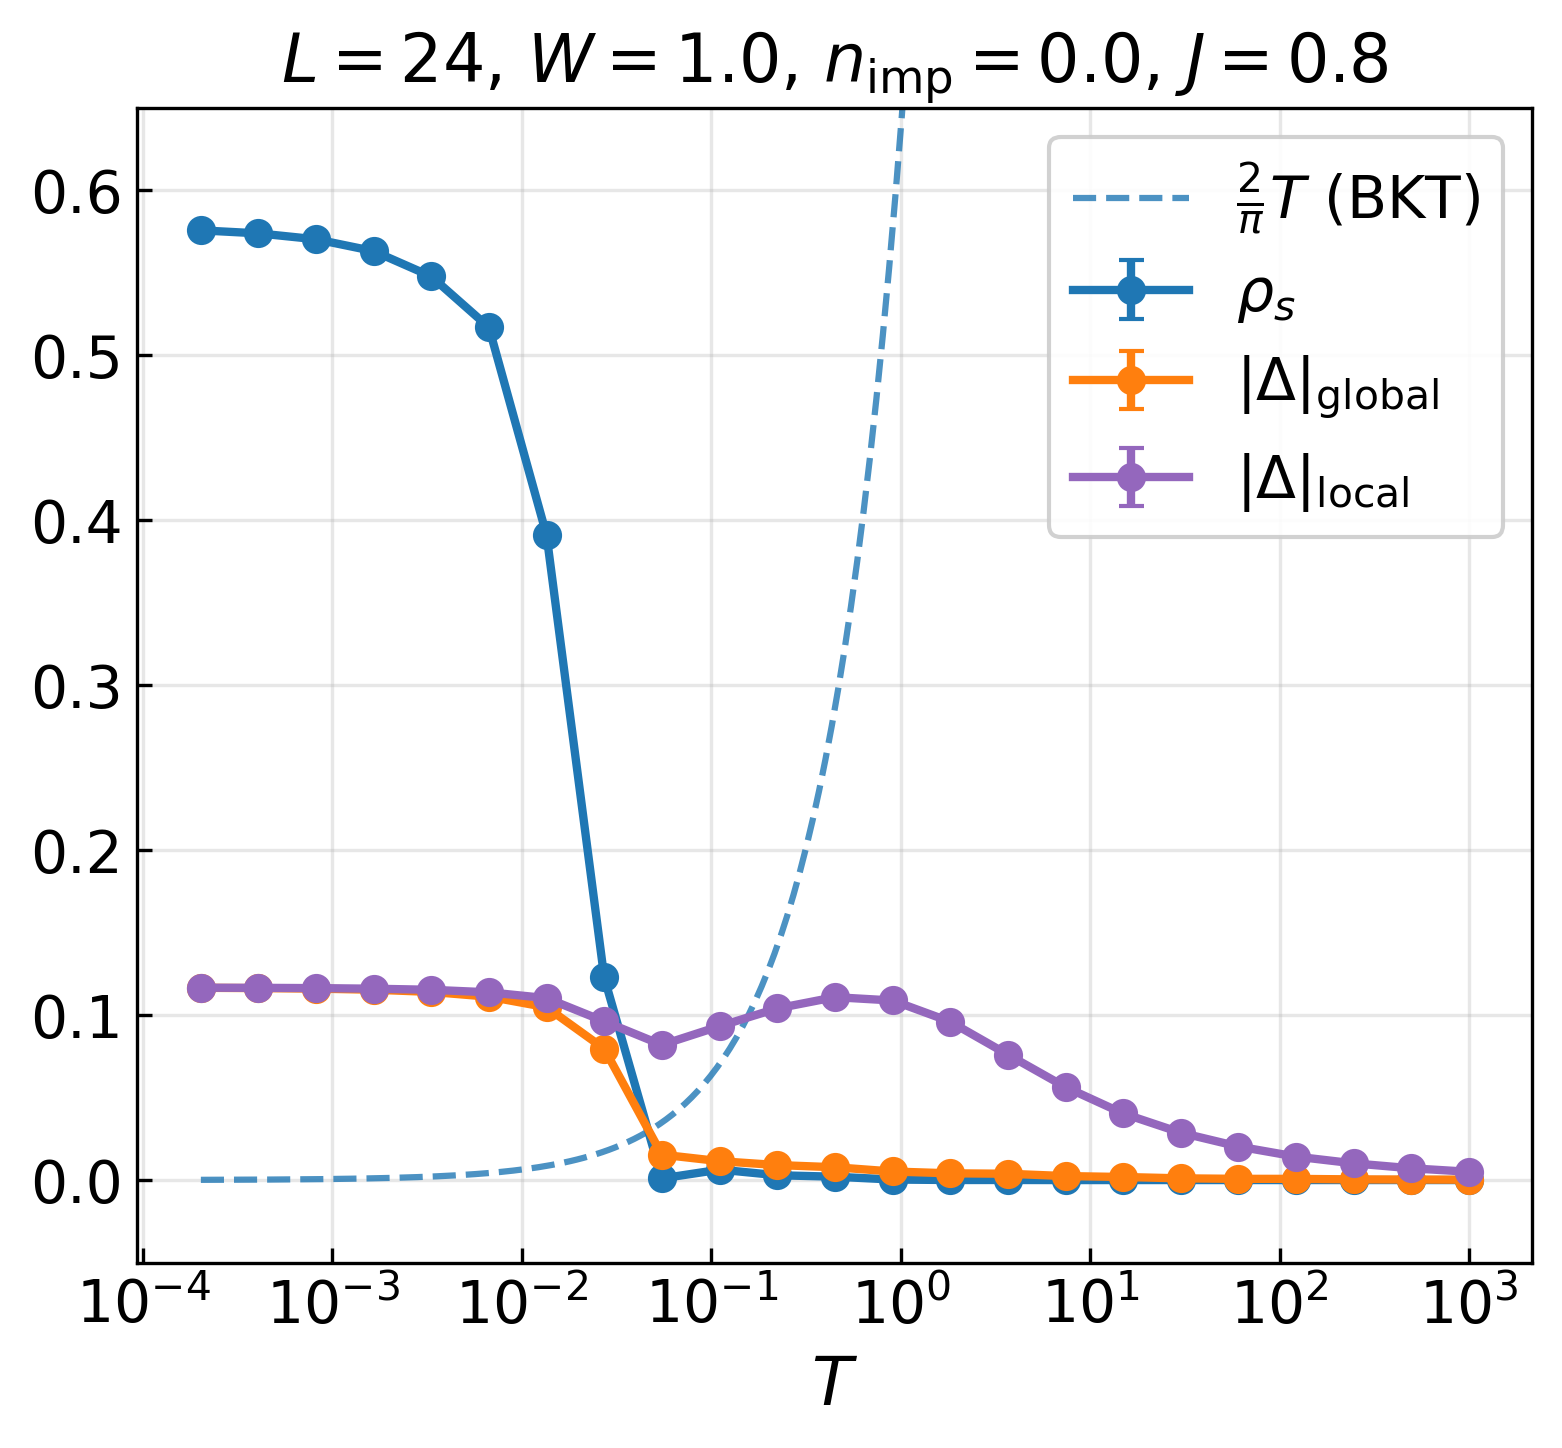

In [99]:
L = 24
J = 0.8
W = 1.0
n_imp = 0.0
mu = -1.4
csv_file = f"../data/T_scan_L{L}_J{J}_W{W}_imp{n_imp}_mu_{mu}/summary_all.csv"

# ==========================================
# 读取数据
# ==========================================
if not os.path.exists(csv_file):
    print(f"Error: {csv_file} not found.")
    exit(1)

print(f"Reading data from {csv_file}...")
df = pd.read_csv(csv_file)

# 数据列名参考:
# T,Beta,Accepted_err,Accepted_mean,DC_Conductivity_err,DC_Conductivity_mean,Delta_Amp_err,Delta_Amp_mean,Delta_Diff_err,Delta_Diff_mean,Delta_Glob_err,Delta_Glob_mean,Delta_Loc_err,Delta_Loc_mean,Delta_LocalPair_err,Delta_LocalPair_mean,Delta_Pair_err,Delta_Pair_mean,Energy_err,Energy_mean,Hole_p_err,Hole_p_mean,S_Delta_err,S_Delta_mean,Superfluid_Stiffness_err,Superfluid_Stiffness_mean,dH_err,dH_mean
# 定义自定义 X 轴刻度
custom_xticks = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
custom_xticklabels = [r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$10^{0}$", r"$10^{1}$", r"$10^{2}$", r"$10^{3}$"]

fig, ax = plt.subplots(dpi=300)

ax.errorbar(df['T'], df['Superfluid_Stiffness_mean'], yerr=df['Superfluid_Stiffness_err'], 
            fmt='-o', capsize=3, label=r'$\rho_s$', color='tab:blue', zorder=3)
ax.errorbar(df['T'], df['Delta_Pair_mean'], yerr=df['Delta_Pair_err'], 
            fmt='-o', capsize=3, label=r'$|\Delta|_\mathrm{global}$', color='tab:orange', zorder=3)
ax.errorbar(df['T'], df['Delta_LocalPair_mean'], yerr=df['Delta_LocalPair_err'], 
            fmt='-o', capsize=3, label=r'$|\Delta|_\mathrm{local}$', color='tab:purple', zorder=3)
# ax.errorbar(df['T'], df['DC_Conductivity_mean'], yerr=df['DC_Conductivity_err'], 
#             fmt='-o', capsize=3, label=r'$\sigma(\omega=0)$', color='tab:green', zorder=3)
# ax.errorbar(df['T'], df['Hole_p_mean'], yerr=df['Hole_p_err'], 
#             fmt='-o', capsize=3, label=r'$p$', color='tab:red', zorder=3)

# 绘制 BKT 判据线: rho = 2/pi * T
t_min = df['T'].min()
t_max = df['T'].max()
T_line = np.logspace(np.log10(t_min), np.log10(t_max), 200)
rho_BKT = (2.0 / np.pi) * T_line
ax.plot(T_line, rho_BKT, linestyle='--', color='tab:blue', linewidth=1.5, alpha=0.8,
        label=r'$\frac{2}{\pi}T$ (BKT)', zorder=2)

# 设置坐标轴
ax.set_xscale('log')
ax.set_xlabel(r'$T$')
# ax.set_ylabel(r'$\rho_s$')
ax.set_title(rf'$L={L}$, $W={W}$, $n_{{\mathrm{{imp}}}}={n_imp}$, $J={J}$')
ax.set_ylim(-0.05,0.65) 
# ax.set_xlim(None,0.5) 

# 设置刻度
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)
ax.grid(True, which="both", ls="-", alpha=0.3) # 网格

# ax.legend(loc='lower right', frameon=True, framealpha=0.9)
ax.legend(loc='best', frameon=True, framealpha=0.9)

# plt.tight_layout()
# plt.savefig('py_benchmark_values.png', dpi=output_dpi)
plt.show()

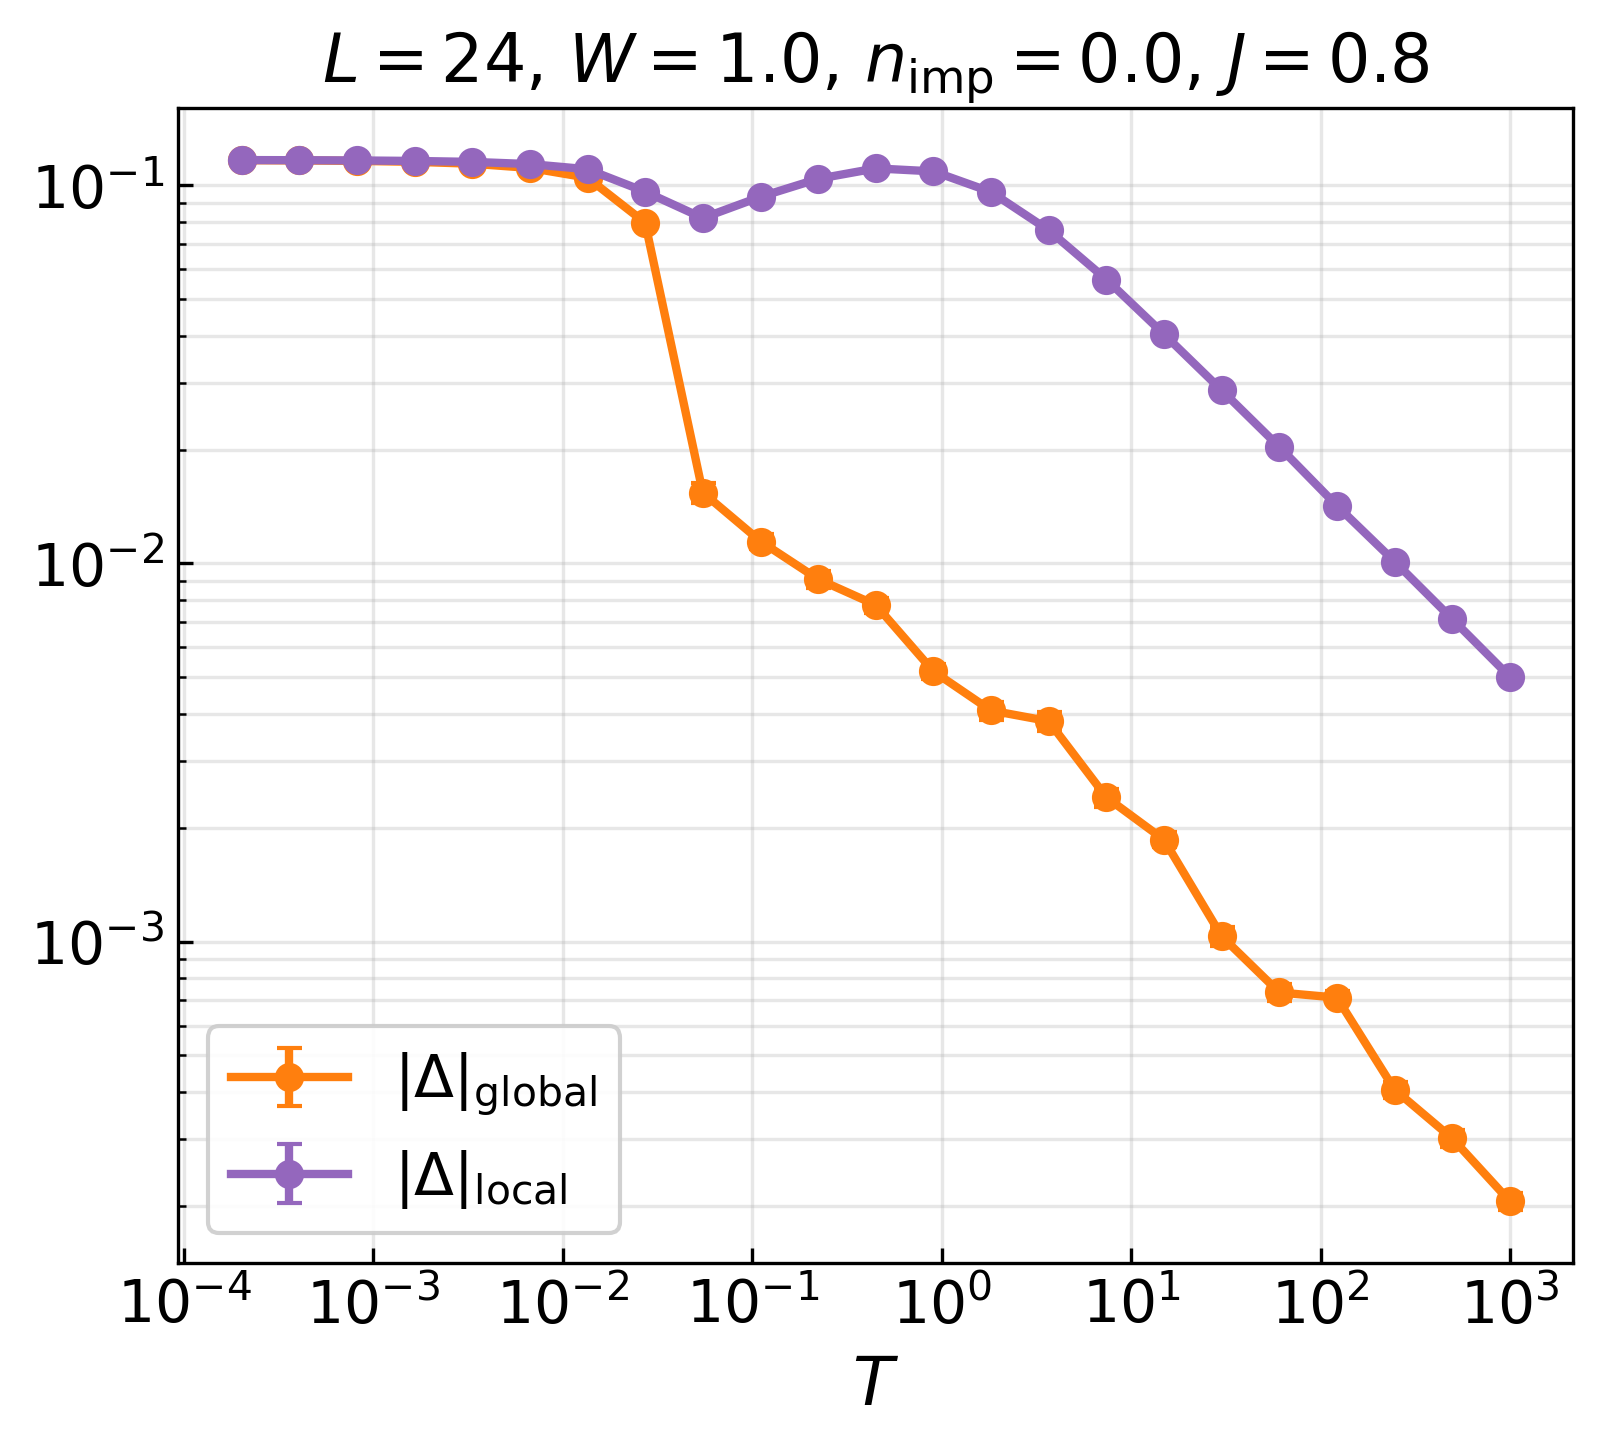

In [86]:
fig, ax = plt.subplots(dpi=300)

ax.errorbar(df['T'], df['Delta_Pair_mean'], yerr=df['Delta_Pair_err'], 
            fmt='-o', capsize=3, label=r'$|\Delta|_\mathrm{global}$', color='tab:orange', zorder=3)
ax.errorbar(df['T'], df['Delta_LocalPair_mean'], yerr=df['Delta_LocalPair_err'], 
            fmt='-o', capsize=3, label=r'$|\Delta|_\mathrm{local}$', color='tab:purple', zorder=3)
# ax.errorbar(df['T'], df['Delta_Loc_mean'], yerr=df['Delta_Loc_err'], 
#             fmt='-o', capsize=3, label=r'$|\Delta|^\ast_\mathrm{local}$', color='tab:red', zorder=3)

# 设置坐标轴
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$T$')
# ax.set_ylabel(r'$\rho_s$')
ax.set_title(rf'$L={L}$, $W={W}$, $n_{{\mathrm{{imp}}}}={n_imp}$, $J={J}$')
# ax.set_ylim(-0.01,0.15) 
# ax.set_xlim(None,0.5) 

# 设置刻度
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)
ax.grid(True, which="both", ls="-", alpha=0.3) # 网格

# ax.legend(loc='lower right', frameon=True, framealpha=0.9)
ax.legend(loc='best', frameon=True, framealpha=0.9)

# plt.tight_layout()
# plt.savefig('py_benchmark_values.png', dpi=output_dpi)
plt.show()

In [103]:
# 1. 选取 T > 1 的数据
mask = (df['T'] > 10) & (df['Delta_LocalPair_mean'] > 0)

T_fit = df.loc[mask, 'T'].values
Delta_fit = df.loc[mask, 'Delta_LocalPair_mean'].values / df.loc[mask, 'Delta_Loc_mean'].values

# 2. log-log 变换
logT = np.log(T_fit)
logDelta = np.log(Delta_fit)

# 3. 线性拟合
slope, intercept = np.polyfit(logT, logDelta, 1)

print(f"log-log slope = {slope:.4f}")
print(f"intercept = {intercept:.4f}")

log-log slope = -0.9959
intercept = -1.6350


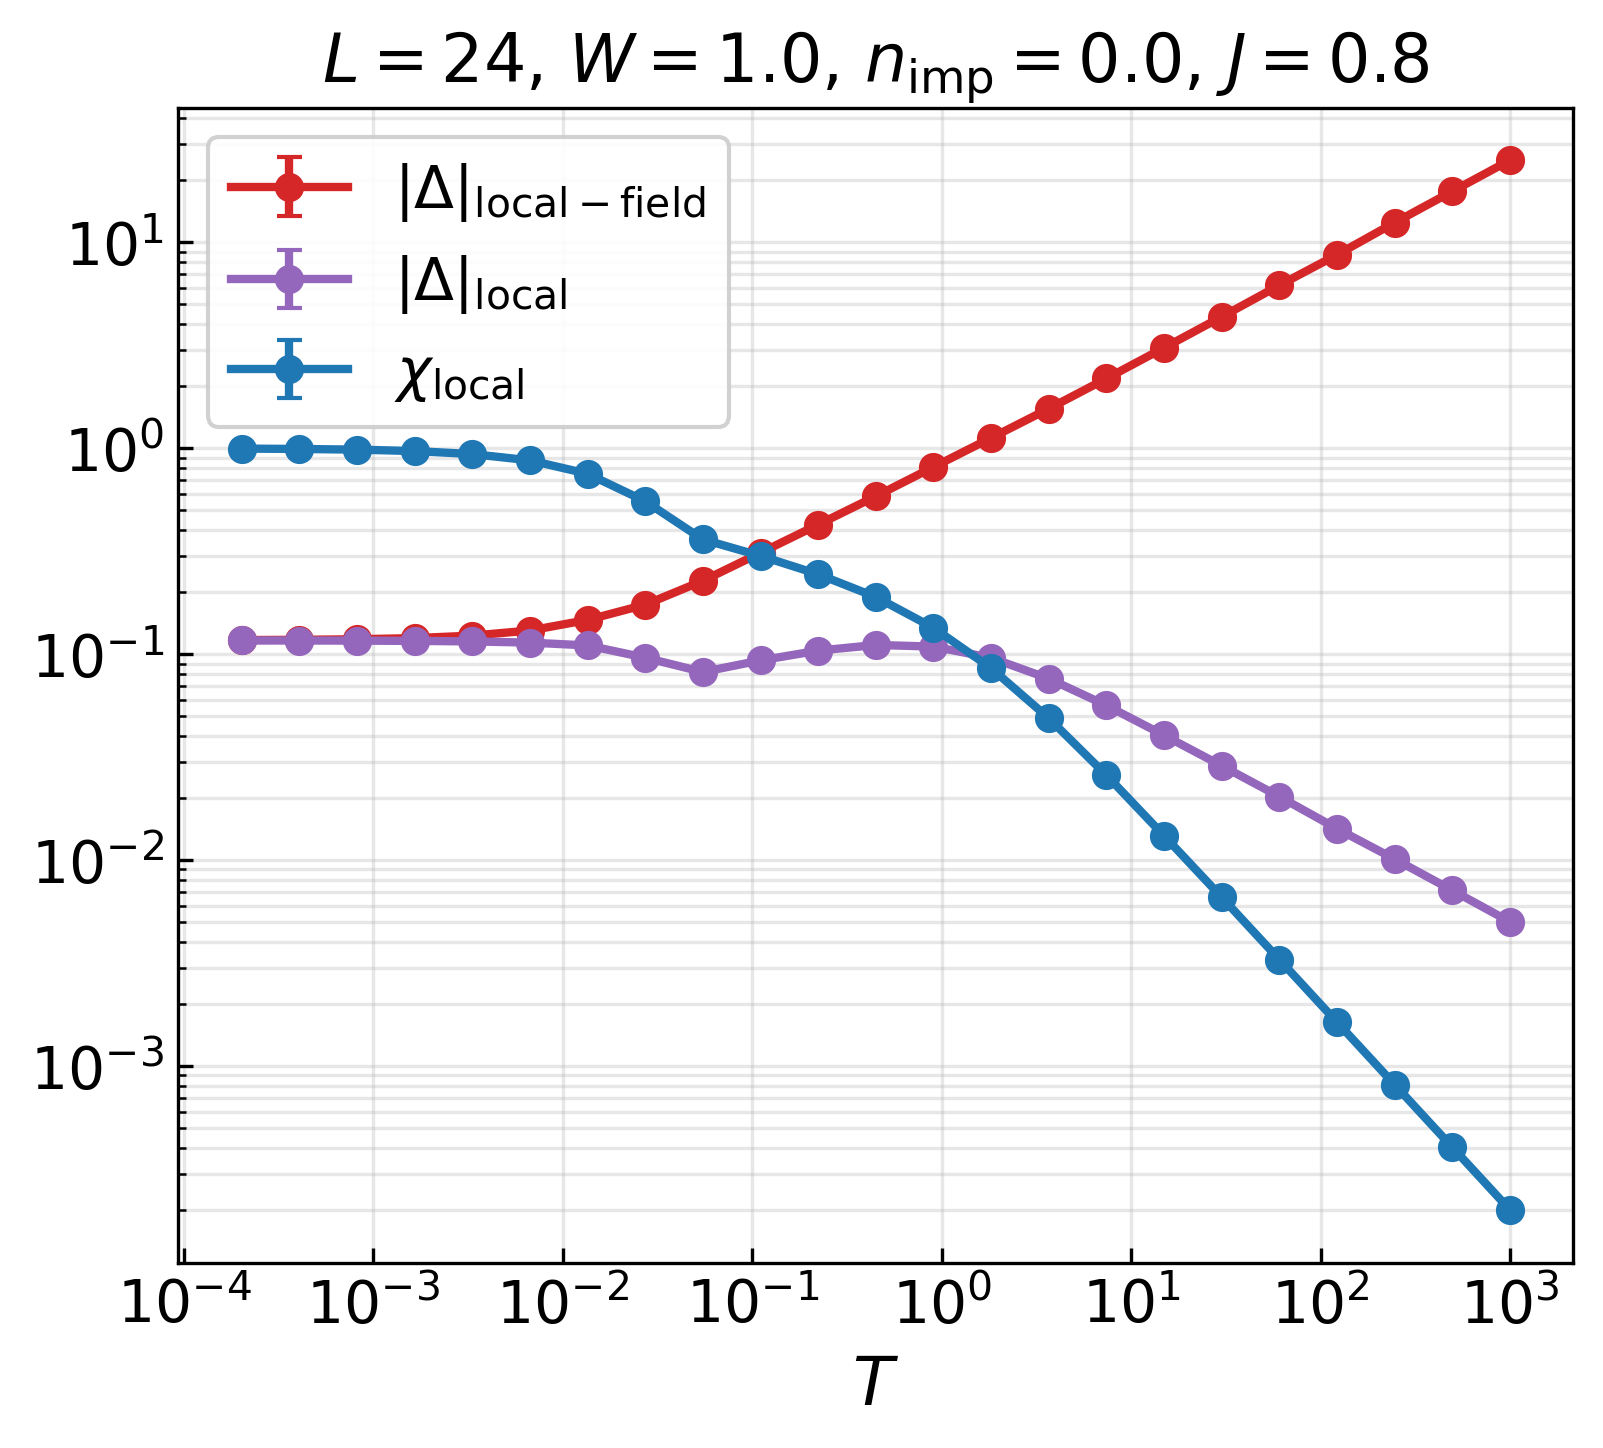

In [100]:
fig, ax = plt.subplots(dpi=300)

ax.errorbar(df['T'], df['Delta_Loc_mean'], yerr=df['Delta_Loc_err'], 
            fmt='-o', capsize=3, label=r'$|\Delta|_\mathrm{local-field}$', color='tab:red', zorder=3)
ax.errorbar(df['T'], df['Delta_LocalPair_mean'], yerr=df['Delta_LocalPair_err'], 
            fmt='-o', capsize=3, label=r'$|\Delta|_\mathrm{local}$', color='tab:purple', zorder=3)
ax.errorbar(df['T'], df['Delta_LocalPair_mean']/df['Delta_Loc_mean'], yerr=df['Delta_LocalPair_err']/df['Delta_Loc_mean'], 
            fmt='-o', capsize=3, label=r'$\chi_\mathrm{local}$', color='tab:blue', zorder=3)
# ax.errorbar(df['T'], df['Delta_Pair_mean'], yerr=df['Delta_Pair_err'], 
#             fmt='-o', capsize=3, label=r'$|\Delta|_\mathrm{global}$', color='tab:orange', zorder=3)

# 设置坐标轴
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$T$')
# ax.set_ylabel(r'$\rho_s$')
ax.set_title(rf'$L={L}$, $W={W}$, $n_{{\mathrm{{imp}}}}={n_imp}$, $J={J}$')
# ax.set_ylim(-0.01,0.15) 
# ax.set_xlim(None,0.5) 

# 设置刻度
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)
ax.grid(True, which="both", ls="-", alpha=0.3) # 网格

# ax.legend(loc='lower right', frameon=True, framealpha=0.9)
ax.legend(loc='best', frameon=True, framealpha=0.9)

# plt.tight_layout()
# plt.savefig('py_benchmark_values.png', dpi=output_dpi)
plt.show()

In [101]:
# 1. 选取 T > 1 的数据
mask = (df['T'] > 10) & (df['Delta_Loc_mean'] > 0)

T_fit = df.loc[mask, 'T'].values
Delta_fit = df.loc[mask, 'Delta_Loc_mean'].values

# 2. log-log 变换
logT = np.log(T_fit)
logDelta = np.log(Delta_fit)

# 3. 线性拟合
slope, intercept = np.polyfit(logT, logDelta, 1)

print(f"log-log slope = {slope:.4f}")
print(f"intercept = {intercept:.4f}")

log-log slope = 0.4994
intercept = -0.2286


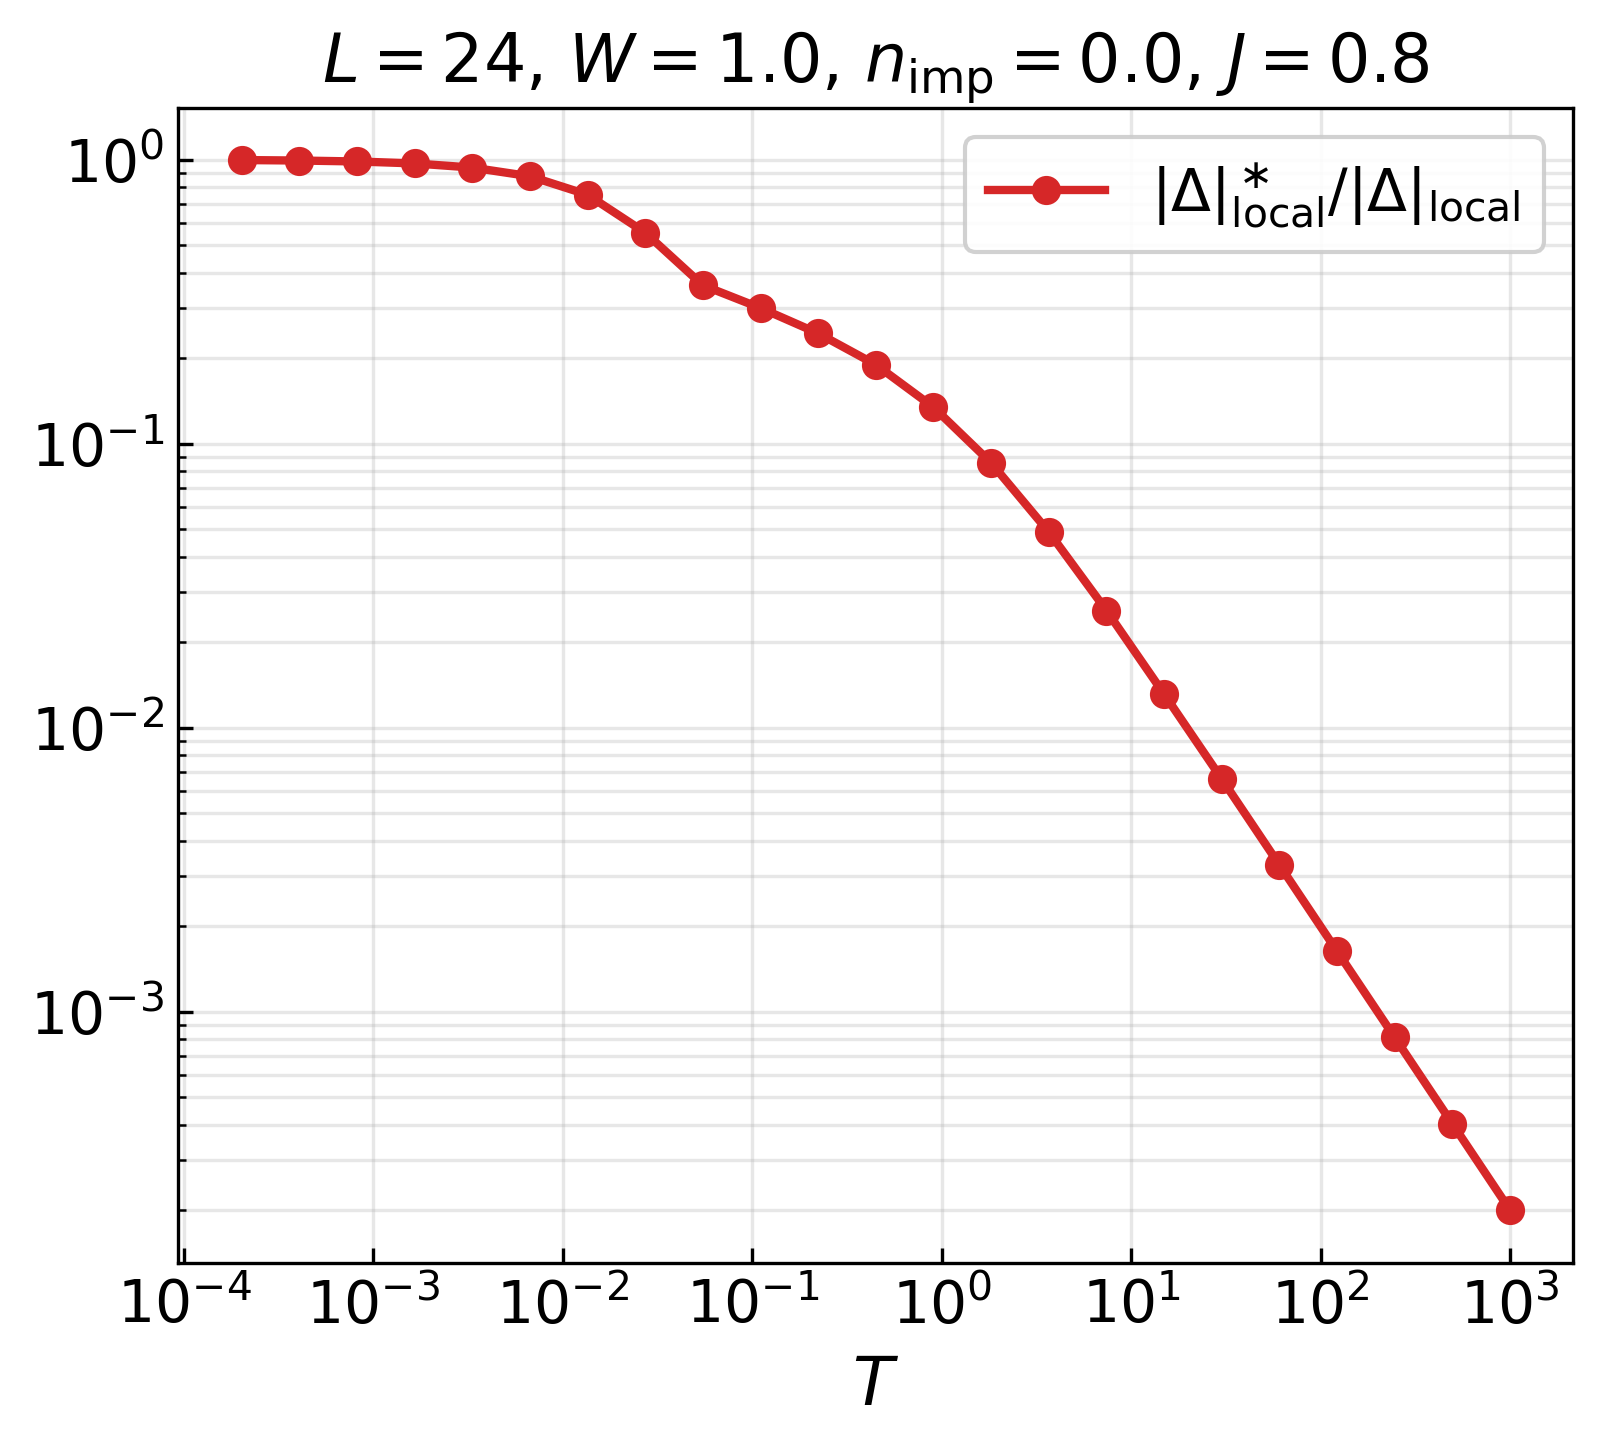

In [75]:
fig, ax = plt.subplots(dpi=300)

ax.errorbar(df['T'], df['Delta_LocalPair_mean']/df['Delta_Loc_mean'], 
            fmt='-o', capsize=3, label=r'$|\Delta|^\ast_\mathrm{local}/|\Delta|_\mathrm{local}$', color='tab:red', zorder=3)

# 设置坐标轴
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$T$')
# ax.set_ylabel(r'$\rho_s$')
ax.set_title(rf'$L={L}$, $W={W}$, $n_{{\mathrm{{imp}}}}={n_imp}$, $J={J}$')
# ax.set_ylim(-0.01,0.15) 
# ax.set_xlim(None,0.5) 

# 设置刻度
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)
ax.grid(True, which="both", ls="-", alpha=0.3) # 网格

# ax.legend(loc='lower right', frameon=True, framealpha=0.9)
ax.legend(loc='best', frameon=True, framealpha=0.9)

# plt.tight_layout()
# plt.savefig('py_benchmark_values.png', dpi=output_dpi)
plt.show()

In [106]:
beta

3     606.060606
4     301.204819
5     149.253731
6      74.074074
7      36.764706
8      18.248175
9       9.009009
10      4.484305
11      2.227171
12      1.104972
13      0.549451
14      0.272480
15      0.134953
16      0.067114
17      0.033223
18      0.016502
19      0.008197
20      0.004065
21      0.002016
22      0.001000
Name: Beta, dtype: float64

In [107]:
R

3              inf
4     1.821494e+05
5     2.082110e+01
6     5.141931e-01
7     2.909969e-01
8     5.105915e-01
9     9.047649e-01
10    1.490875e+00
11    1.788493e+00
12    1.446940e+00
13    1.694724e+00
14    4.324847e+00
15    1.622336e+01
16    4.875808e+01
17    1.416352e+02
18    3.947420e+02
19    1.096696e+03
20    2.580645e+03
21    6.045584e+03
22    1.236858e+04
Name: DC_Conductivity_mean, dtype: float64

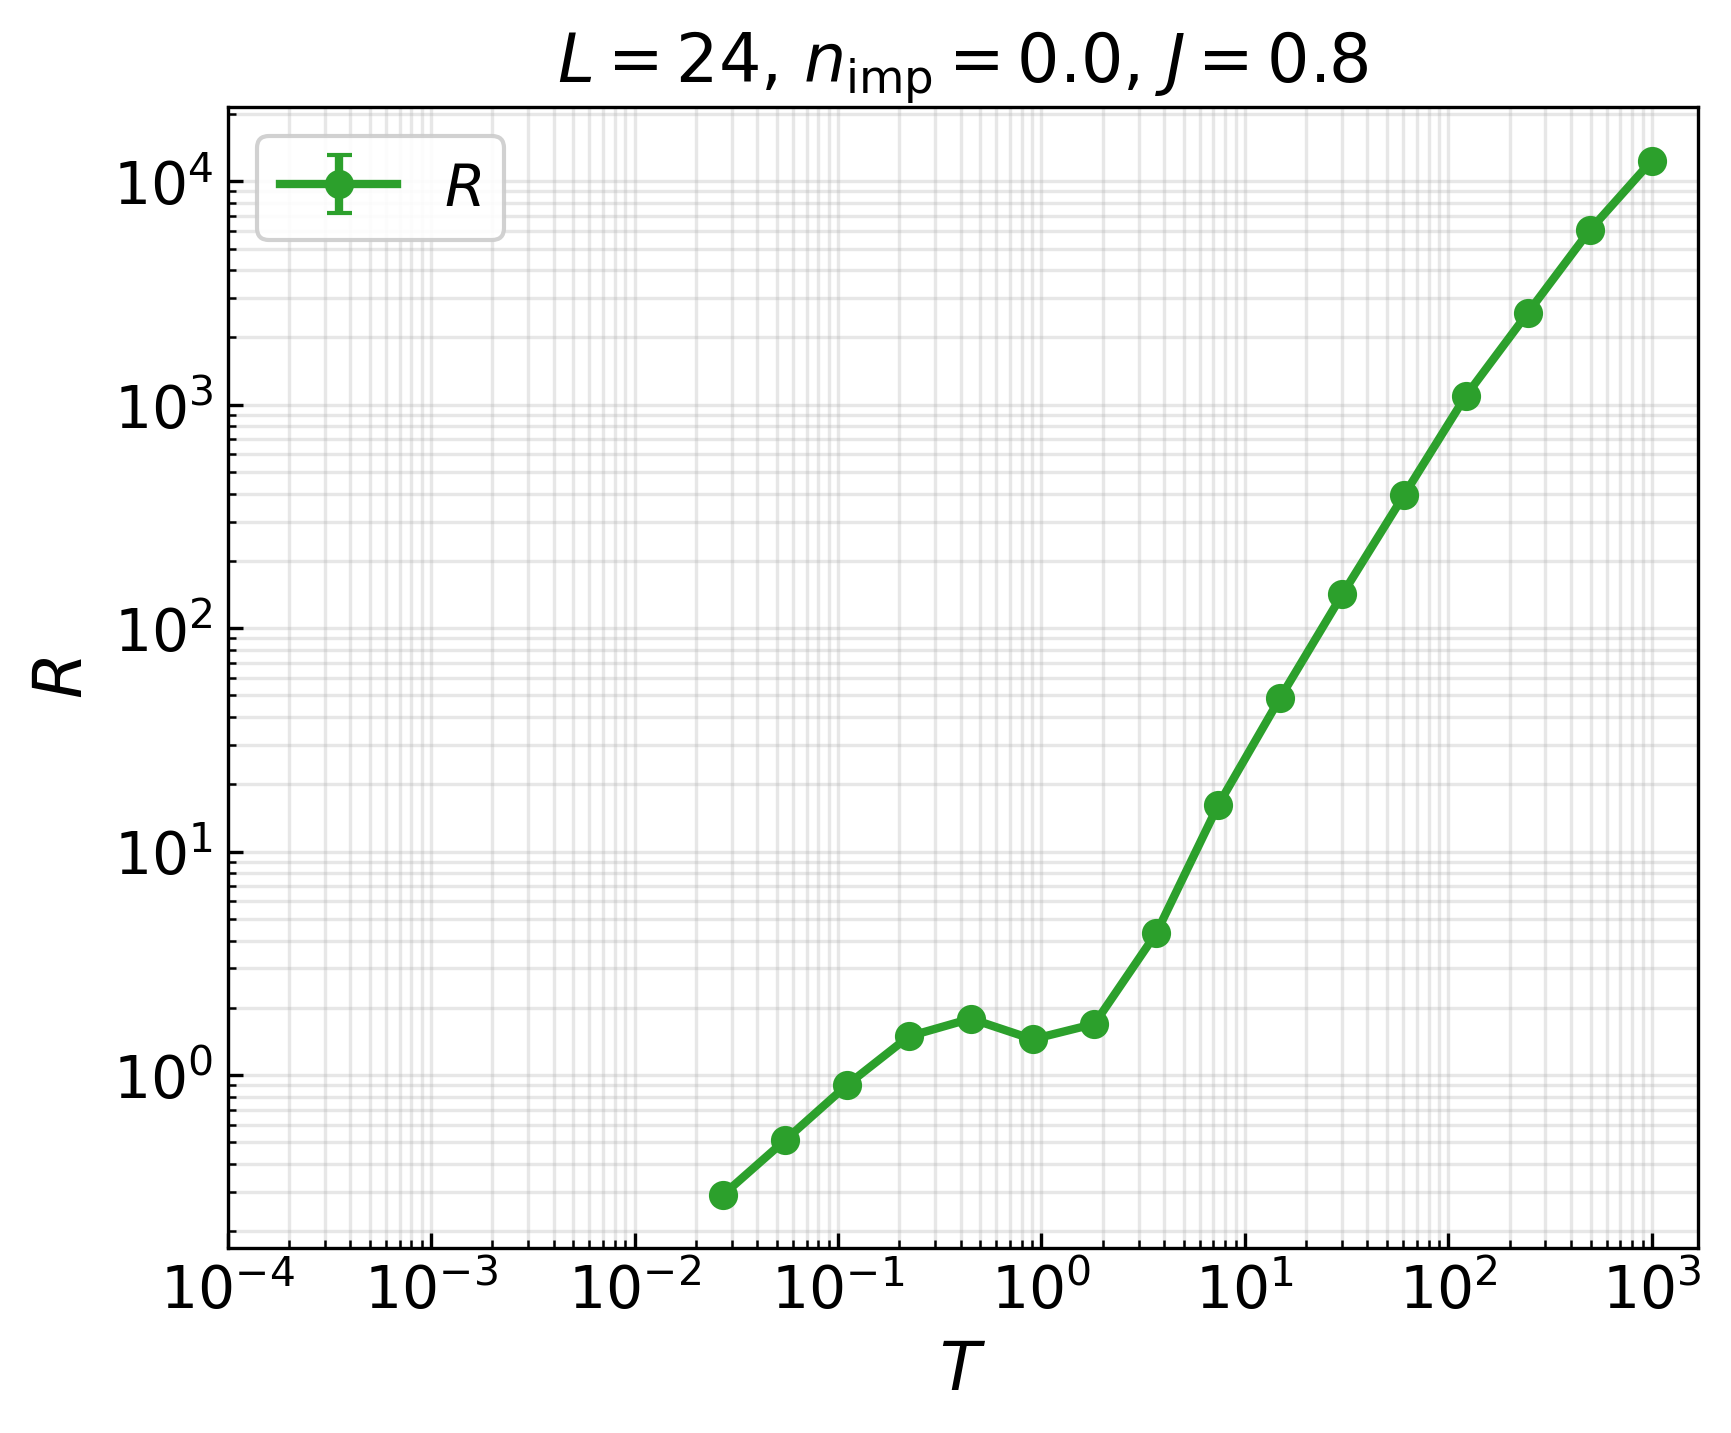

In [109]:
fig, ax = plt.subplots(dpi=300)

beta = df['Beta'][7:]
sigma = df['DC_Conductivity_mean'][7:]
sigma_err = df['DC_Conductivity_err'][7:]

T = 1 / beta
R = 1 / sigma
R_err = sigma_err / (sigma**2)


ax.errorbar(T, R, yerr=R_err, 
            fmt='-o', capsize=3, label=r'$R$', color='tab:green', zorder=3)

# 设置坐标轴
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$R$')
ax.set_title(rf'$L={L}$, $n_{{\mathrm{{imp}}}}={n_imp}$, $J={J}$')
# ax.set_ylim(0,0.38) 

# 设置刻度
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)
ax.grid(True, which="both", ls="-", alpha=0.3) # 网格

# ax.legend(loc='lower right', frameon=True, framealpha=0.9)
ax.legend(loc='best', frameon=True, framealpha=0.9)

plt.tight_layout()
# plt.savefig('py_benchmark_values.png', dpi=output_dpi)
plt.show()

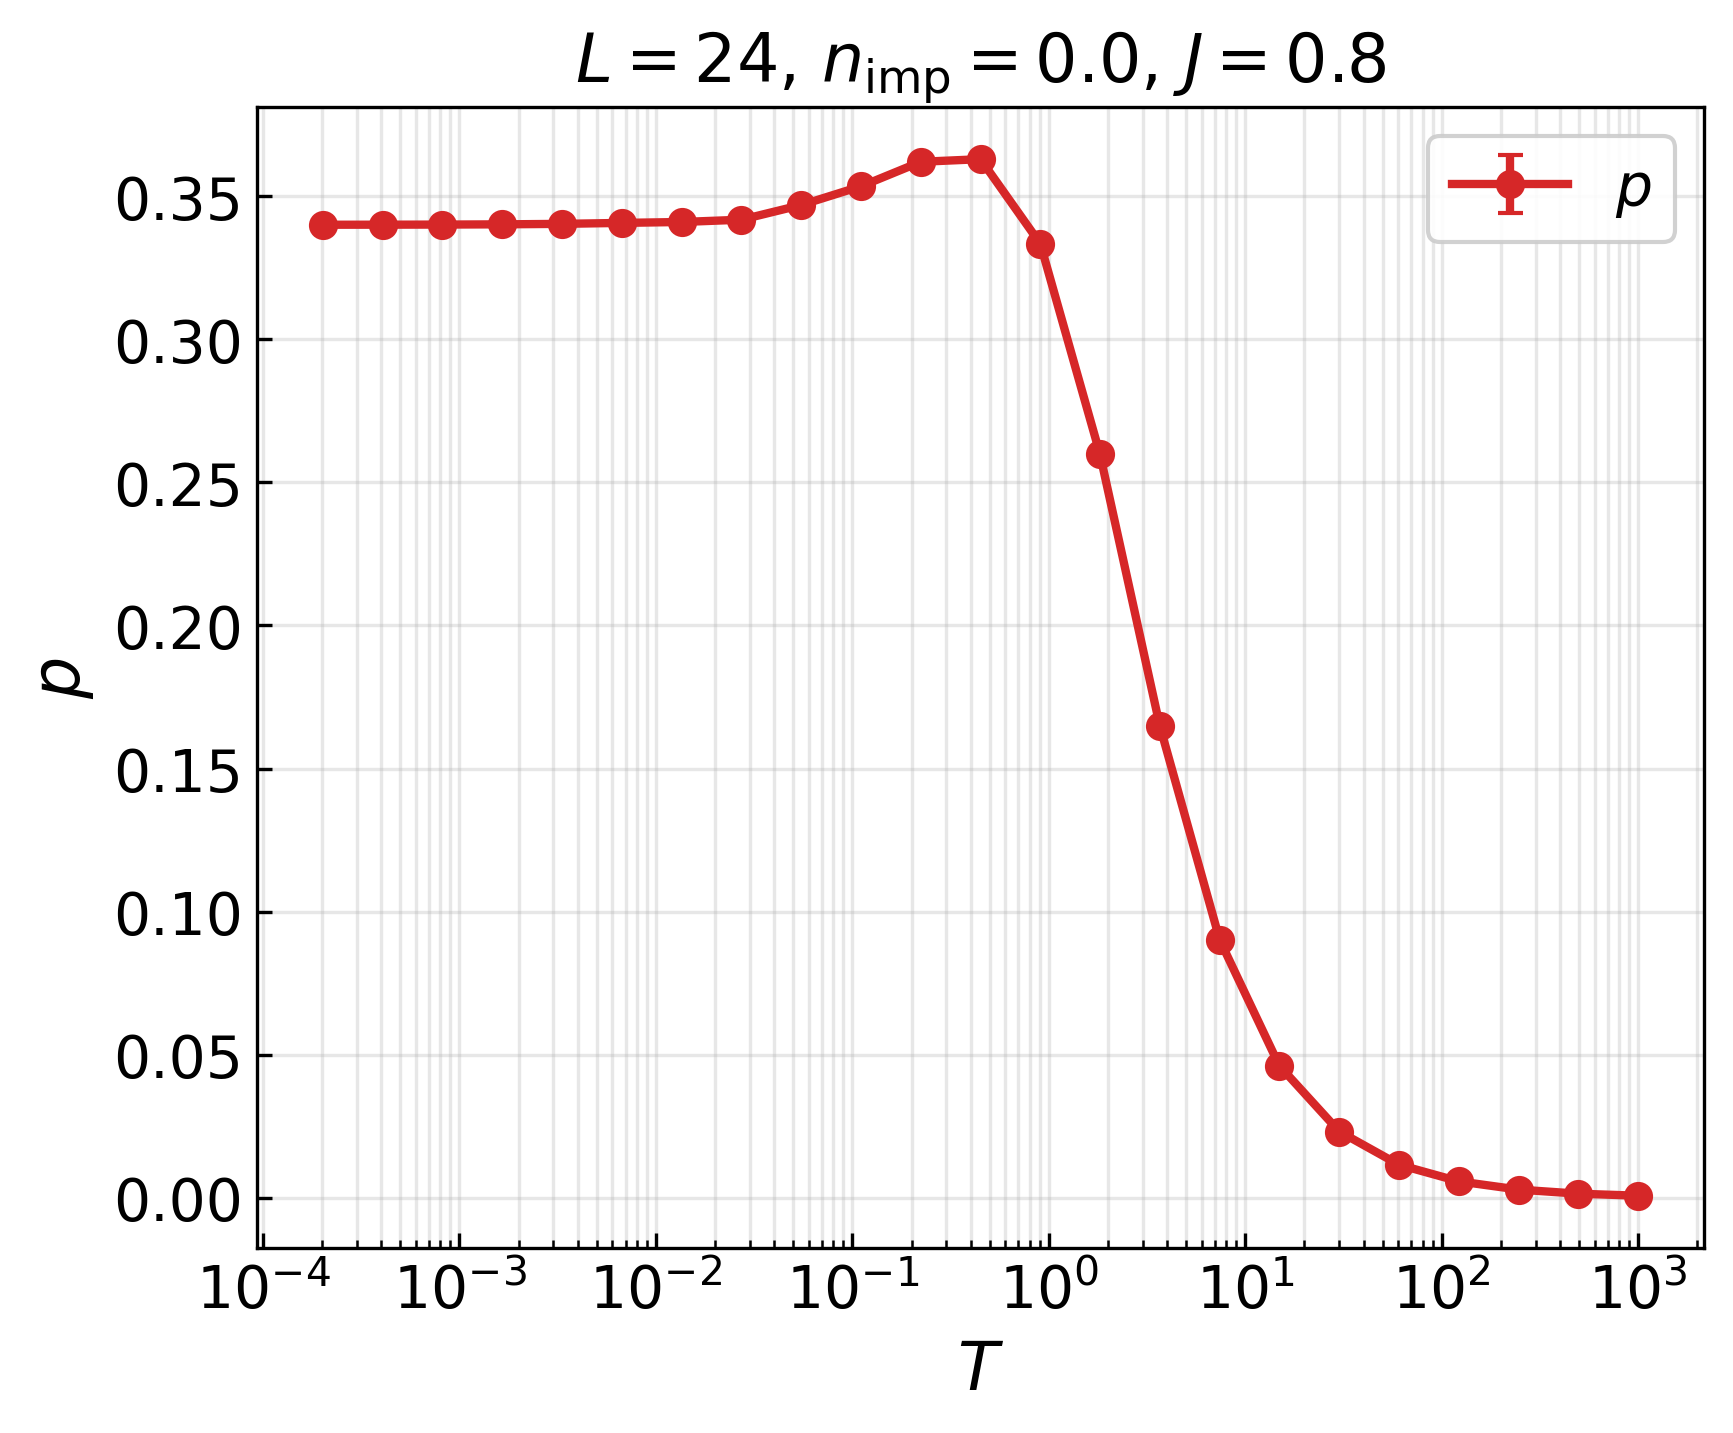

In [77]:
fig, ax = plt.subplots(dpi=300)

beta = df['Beta'][:]
p = df['Hole_p_mean'][:]
p_err = df['Hole_p_err'][:]

T = 1 / beta


ax.errorbar(T, p, yerr=p_err, 
            fmt='-o', capsize=3, label=r'$p$', color='tab:red', zorder=3)

# 设置坐标轴
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$p$')
ax.set_title(rf'$L={L}$, $n_{{\mathrm{{imp}}}}={n_imp}$, $J={J}$')
# ax.set_ylim(0,0.38) 

# 设置刻度
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)
ax.grid(True, which="both", ls="-", alpha=0.3) # 网格

# ax.legend(loc='lower right', frameon=True, framealpha=0.9)
ax.legend(loc='best', frameon=True, framealpha=0.9)

plt.tight_layout()
# plt.savefig('py_benchmark_values.png', dpi=output_dpi)
plt.show()

In [78]:
T

0        0.000202
1        0.000406
2        0.000819
3        0.001650
4        0.003320
5        0.006700
6        0.013500
7        0.027200
8        0.054800
9        0.111000
10       0.223000
11       0.449000
12       0.905000
13       1.820000
14       3.670000
15       7.410000
16      14.900000
17      30.100000
18      60.600000
19     122.000000
20     246.000000
21     496.000000
22    1000.000000
Name: Beta, dtype: float64